In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,4]
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Perceptron, RidgeClassifier
from sklearn.svm import SVC

In [3]:
iris = datasets.load_iris(as_frame=True)
iris_X = iris.data
iris_y = iris.target
iris_X = iris_X[::4]
iris_y = iris_y[::4]
iris_y2 = iris_y.copy()
iris_y2[iris_y2 == 2] = 1
iris_y2[iris_y2 == 0] = -1
pd.concat([iris_X, iris_y2], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,-1
4,5.0,3.6,1.4,0.2,-1
8,4.4,2.9,1.4,0.2,-1
12,4.8,3.0,1.4,0.1,-1
16,5.4,3.9,1.3,0.4,-1


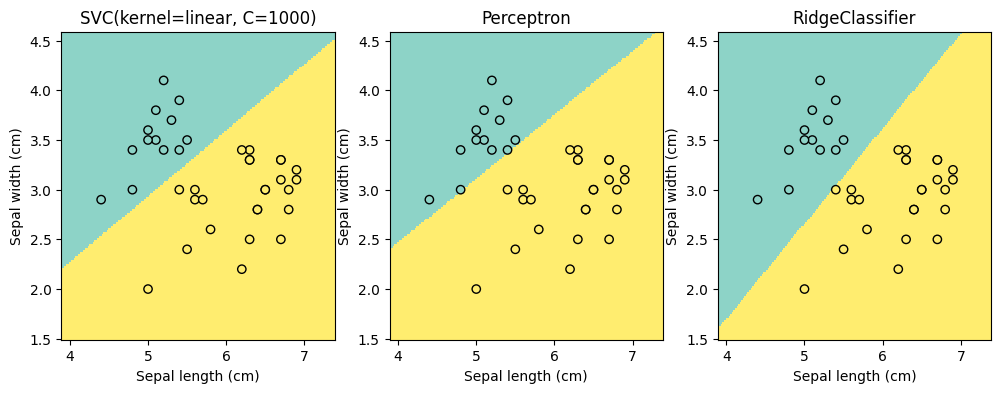

In [6]:
X = iris_X.to_numpy()[:,:2]
xmin, xmax = X[:,0].min()-0.5, X[:,0].max()+0.5
ymin, ymax = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.02), np.arange(ymin, ymax, 0.02))

models = [SVC(kernel='linear', C=1000), Perceptron(), RidgeClassifier()]
model_names = ['SVC(kernel=linear, C=1000)', 'Perceptron', 'RidgeClassifier']

def fit_and_create_boundary(model):
  model.fit(X, iris_y2)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  return Z

for i, model in enumerate(models):
  Z = fit_and_create_boundary(model)
  plt.subplot(1,3,(i+1))
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set3)
  plt.scatter(X[:,0], X[:,1], c=iris_y2, edgecolors='k', cmap=plt.cm.Set3)
  plt.title(model_names[i])
  plt.xlabel('Sepal length (cm)')
  plt.ylabel('Sepal width (cm)')

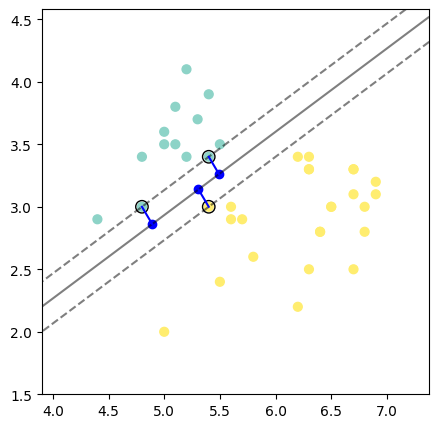

In [22]:
clf = SVC(kernel='linear', C=1000)
clf.fit(X, iris_y2)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=iris_y2, s=40, cmap=plt.cm.Set3)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, facecolors='none', edgecolors='k')
theta = clf.coef_[0]
theta0 = clf.intercept_
# clf.support_ - indeces of support vectors
for idx in clf.support_:
  x0 = X[idx]
  y0 = iris_y2.iloc[idx]
  margin_x0 = (theta.dot(x0) + theta0)[0] / np.linalg.norm(theta)
  w = theta / np.linalg.norm(theta)
  plt.plot([x0[0], x0[0]-w[0]*margin_x0], [x0[1], x0[1]-w[1]*margin_x0], color='blue')
  plt.scatter([x0[0]-w[0]*margin_x0], [x0[1]-w[1]*margin_x0], color='blue')